#                      NLP_Resume_Automation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns
import glob
import docx2txt
import PyPDF2 #case sensitive
import os

### Format Conversion from Doc to docx

In [2]:
import re
import docx
y=[]
count=0
for x in os.listdir('resumes/'):
    if re.match('.*\.docx|.*\.doc', x):
        y.append("file_no "+str(count)+":"+x)
        count=count+1
print(y)

['file_no 0:PL SAIRAM Latest Resume.docx', 'file_no 1:rajajii.Resume.doc', 'file_no 2:RESUME.docx']


In [3]:
import glob
types = ('resumes/*.docx', 'resumes/*.doc') # the tuple of file types
files_grabbed = []
for files in types:
    files_grabbed.extend(glob.glob(files))
files_grabbed

['resumes\\PL SAIRAM Latest Resume.docx',
 'resumes\\RESUME.docx',
 'resumes\\rajajii.Resume.doc']

In [4]:
from glob import glob
import re
import os
import win32com.client as win32
from win32com.client import constants

# Create list of paths to .doc files
paths = glob('C:\\Users\\SAI\\machine_learning-use case NLP Resume\\resumes\\*.doc', recursive=True)

def save_as_docx(path):
    # Opening MS Word
    word = win32.gencache.EnsureDispatch('Word.Application')
    doc = word.Documents.Open(path)
    doc.Activate ()

    # Rename path with .docx
    new_file_abs = os.path.abspath(path)
    new_file_abs = re.sub(r'\.\w+$', '.docx', new_file_abs)

    # Save and Close
    word.ActiveDocument.SaveAs(
        new_file_abs, FileFormat=constants.wdFormatXMLDocument
    )
    doc.Close(False)

for path in paths:
    save_as_docx(path)


In [5]:
import os
import glob

files = glob.glob('resumes/*.doc')
for f in files:
    os.remove(f)



### Creating unique name for each resume

In [6]:
import os
import uuid
source_directory = os.path.join(os.getcwd(), "resumes")

for filename in os.listdir(source_directory):
    file, extension = os.path.splitext(filename)
    unique_filename = str(uuid.uuid4()) + extension
    os.rename(os.path.join(source_directory,  filename), os.path.join(source_directory, unique_filename))

In [7]:
import os
import uuid
import textract
training_directory = os.path.join(os.getcwd(), "resumes")

for process_file in  os.listdir(source_directory):
    file, extension = os.path.splitext(process_file)
    
    # We create a new text file name by concatenating the .txt extension to file UUID
    dest_file_path = file + '.txt'
    
    #extract text from the file
    content = textract.process(os.path.join(source_directory, process_file))
    
    # We create and open the new and we prepare to write the Binary Data which is represented by the wb - Write Binary
    write_text_file = open(os.path.join(training_directory, dest_file_path), "wb")
    
    #write the content and close the newly created file
    write_text_file.write(content)
    write_text_file.close()

In [8]:
'''import os
import glob

files = glob.glob('resumes/*.docx')
for f in files:
    os.remove(f)'''

"import os\nimport glob\n\nfiles = glob.glob('resumes/*.docx')\nfor f in files:\n    os.remove(f)"

## DataCleaning and massaing

In [9]:
folder = r"resumes/"
filepaths = glob.glob(os.path.join(folder, '*docx'))
for fp in filepaths:
    with open(fp, 'r') as f:
        print(fp)
        

resumes\19238639-879f-4806-bc93-68fb9479367d.docx
resumes\e65b56d6-e276-4d1b-a2ce-12323f369380.docx
resumes\f9cf9622-fac3-48bd-963d-7b7cf76a1956.docx


In [10]:
folder = r"resumes/"
# Create an empty list for collecting the headers
headers=[]
file_names_lst=[]
# Get filepaths for all files which end with ".txt" and start with "travel_times_to_ 59721":
filepaths = glob.glob(os.path.join(folder, '*txt'))

In [11]:
# iterate for each file path in the list
#After going trough all the files, print the list of headers
for fp in filepaths:
    with open(fp, 'r') as f:
        first_line = f.readlines()
        headers.append(first_line)
        print(headers)
    

[['SAIRAM PATHIKONDA LAKSHMI\n', '\n', 'E - M A I L : pathikondalakshmisairam@gmail.com\n', '\n', ' P H O N E : + 9 1 â€“ 9910649514\n', '\n', '\n', '\n', 'Professional Summary: 3 +  years of relevant experience in IT industry using Big Data.\n', '\n', 'Experience of working in the Software development life cycle involving development, documentation, testing and maintenance.\n', '\n', 'Having good understanding of ETL concepts and process.\n', '\n', 'Adaptive to Cloud Strategies based on AWS (Amazon Web Services).\n', '\n', 'Experience of working with AWS services (DataPipeline, Step function, S3, Lambda, Cloud Watch, EMR, Athena, Redshift)\n', '\n', 'Able to writing basic PYTHON code to implement AWS LAMBDA. Experience of processing structured and semi-structured data using Spark SQL.\n', '\n', 'Good Experience in analysis of business requirements and prioritizing the issues accordingly. Experience in understanding clear requirements from the customer.\n', '\n', 'Ability to work well 

In [12]:
fp

'resumes\\f9cf9622-fac3-48bd-963d-7b7cf76a1956.txt'

In [13]:
body=headers

In [14]:
type(body)

list

In [15]:
body=(str(body).replace('\\n', '').replace('\n', '').replace('\t', '').replace('\\t', '').replace('',""))
body

"[['SAIRAM PATHIKONDA LAKSHMI', '', 'E - M A I L : pathikondalakshmisairam@gmail.com', '', ' P H O N E : + 9 1 â€“ 9910649514', '', '', '', 'Professional Summary: 3 +  years of relevant experience in IT industry using Big Data.', '', 'Experience of working in the Software development life cycle involving development, documentation, testing and maintenance.', '', 'Having good understanding of ETL concepts and process.', '', 'Adaptive to Cloud Strategies based on AWS (Amazon Web Services).', '', 'Experience of working with AWS services (DataPipeline, Step function, S3, Lambda, Cloud Watch, EMR, Athena, Redshift)', '', 'Able to writing basic PYTHON code to implement AWS LAMBDA. Experience of processing structured and semi-structured data using Spark SQL.', '', 'Good Experience in analysis of business requirements and prioritizing the issues accordingly. Experience in understanding clear requirements from the customer.', '', 'Ability to work well in both team environment and individual env

In [16]:
fin_body=eval(body)

In [17]:
fin_body

[['SAIRAM PATHIKONDA LAKSHMI',
  '',
  'E - M A I L : pathikondalakshmisairam@gmail.com',
  '',
  ' P H O N E : + 9 1 â€“ 9910649514',
  '',
  '',
  '',
  'Professional Summary: 3 +  years of relevant experience in IT industry using Big Data.',
  '',
  'Experience of working in the Software development life cycle involving development, documentation, testing and maintenance.',
  '',
  'Having good understanding of ETL concepts and process.',
  '',
  'Adaptive to Cloud Strategies based on AWS (Amazon Web Services).',
  '',
  'Experience of working with AWS services (DataPipeline, Step function, S3, Lambda, Cloud Watch, EMR, Athena, Redshift)',
  '',
  'Able to writing basic PYTHON code to implement AWS LAMBDA. Experience of processing structured and semi-structured data using Spark SQL.',
  '',
  'Good Experience in analysis of business requirements and prioritizing the issues accordingly. Experience in understanding clear requirements from the customer.',
  '',
  'Ability to work well 

In [18]:
j=0
b=[]
for i in fin_body:
    b.append(",".join(fin_body[j][:]))
    j=j+1
print(b)

['SAIRAM PATHIKONDA LAKSHMI,,E - M A I L : pathikondalakshmisairam@gmail.com,, P H O N E : + 9 1 â€“ 9910649514,,,,Professional Summary: 3 +  years of relevant experience in IT industry using Big Data.,,Experience of working in the Software development life cycle involving development, documentation, testing and maintenance.,,Having good understanding of ETL concepts and process.,,Adaptive to Cloud Strategies based on AWS (Amazon Web Services).,,Experience of working with AWS services (DataPipeline, Step function, S3, Lambda, Cloud Watch, EMR, Athena, Redshift),,Able to writing basic PYTHON code to implement AWS LAMBDA. Experience of processing structured and semi-structured data using Spark SQL.,,Good Experience in analysis of business requirements and prioritizing the issues accordingly. Experience in understanding clear requirements from the customer.,,Ability to work well in both team environment and individual environment.,,Proven experience in meeting deadlines and appreciation f

In [19]:
import glob

txtfiles = []
for file in glob.glob("resumes/*.docx"):
    txtfiles.append(file)

In [20]:
txtfiles

['resumes\\19238639-879f-4806-bc93-68fb9479367d.docx',
 'resumes\\e65b56d6-e276-4d1b-a2ce-12323f369380.docx',
 'resumes\\f9cf9622-fac3-48bd-963d-7b7cf76a1956.docx']

In [21]:
feat_df1 = pd.DataFrame(txtfiles,columns =['Names']) 
feat_df1 

,Names
0,resumes\19238639-879f-4806-bc93-68fb9479367d.docx
1,resumes\e65b56d6-e276-4d1b-a2ce-12323f369380.docx
2,resumes\f9cf9622-fac3-48bd-963d-7b7cf76a1956.docx


### Feature Extraction 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer()

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(b)

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
feat_df=pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
feat_df

,10,13,13th,1995,2000,2011,2013,2014,2015,2016,...,workshops,world,writing,written,xiith,xp,xth,year,years,yours
0,0,0,0,0,0,1,1,0,0,0,...,0,0,2,1,1,0,1,1,1,0
1,2,0,0,0,0,1,1,0,0,0,...,0,1,1,0,0,0,0,2,0,0
2,1,1,1,1,1,2,1,1,2,1,...,3,0,0,1,0,1,0,3,0,1


In [23]:
final_df1=feat_df.join(feat_df1)
final_df1

,10,13,13th,1995,2000,2011,2013,2014,2015,2016,...,world,writing,written,xiith,xp,xth,year,years,yours,Names
0,0,0,0,0,0,1,1,0,0,0,...,0,2,1,1,0,1,1,1,0,resumes\19238639-879f-4806-bc93-68fb9479367d.docx
1,2,0,0,0,0,1,1,0,0,0,...,1,1,0,0,0,0,2,0,0,resumes\e65b56d6-e276-4d1b-a2ce-12323f369380.docx
2,1,1,1,1,1,2,1,1,2,1,...,0,0,1,0,1,0,3,0,1,resumes\f9cf9622-fac3-48bd-963d-7b7cf76a1956.docx


### Final DataSet

In [24]:
#if 'ai' not in final_df1:
#    final_df1['ai'] = 0
#final_df1[['Names','java','aws','lambda','emr','spark','scala','python','networking','ai']]

In [25]:
tech_list=['bigdata','objective c','deeplearing','dataengineer','c++','java','aws','lambda','emr','spark','scala','python','networking','ai','c++']
for i in tech_list:
    if i not in final_df1:
        final_df1[i]=0


In [26]:
final_df=final_df1[['Names','java','aws','lambda','emr','spark','scala','python','networking','ai','bigdata','objective c','c++']]

In [27]:
final_df.to_csv("my final.csv",header=True)

## Data-Visualization

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
## some data setup column level
mylabels=[]
for i in final_df['Names']:
    mylabels.append(i)
mylabels

['resumes\\19238639-879f-4806-bc93-68fb9479367d.docx',
 'resumes\\e65b56d6-e276-4d1b-a2ce-12323f369380.docx',
 'resumes\\f9cf9622-fac3-48bd-963d-7b7cf76a1956.docx']

In [30]:
final_df.set_index('Names',inplace=True)


In [31]:
final_df

,java,aws,lambda,emr,spark,scala,python,networking,ai,bigdata,objective c,c++
Names,,,,,,,,,,,,
resumes\19238639-879f-4806-bc93-68fb9479367d.docx,0,7,2,2,5,2,2,0,0,0,0,0
resumes\e65b56d6-e276-4d1b-a2ce-12323f369380.docx,0,0,0,0,0,0,0,0,0,0,0,0
resumes\f9cf9622-fac3-48bd-963d-7b7cf76a1956.docx,3,0,0,0,0,0,0,2,0,0,0,0


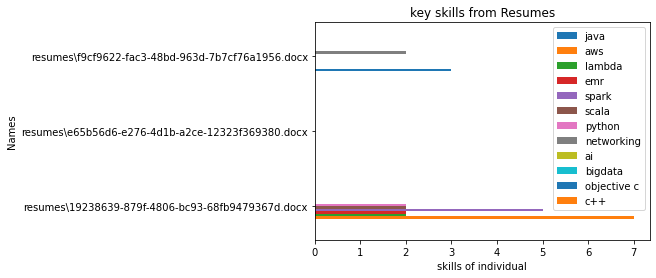

In [32]:

ax1 = final_df.plot.barh(width=0.4)
ax1.set_xlabel('skills of individual') 
ax1.legend()

ax1.set_title('key skills from Resumes') 

plt.show() 


# Done Thank you for watching.